In [1]:
#!pip install name
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Dhaka Rent.csv", sep=';')
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [3]:
df.shape

(60, 2)

In [4]:
df.area.head()

0    2000
1    2100
2    2500
3    2250
4    3000
Name: area, dtype: int64

In [5]:
#area is independent feature, x
#rent is dept. y
x = df['area']
y = df['rent']

In [6]:
x.head()

0    2000
1    2100
2    2500
3    2250
4    3000
Name: area, dtype: int64

In [7]:
y.head()

0    31500
1    35000
2    41050
3    36100
4    52100
Name: rent, dtype: int64

# Least Square Method

In [8]:
mean_x = np.mean(x)
mean_y = np.mean(y)

In [9]:
mean_x

2289.0

In [10]:
df.area.mean()

2289.0

In [11]:
#calculate deviations
dev_x = x - mean_x
dev_y = y - mean_y

In [12]:
dev_x.head()

0   -289.0
1   -189.0
2    211.0
3    -39.0
4    711.0
Name: area, dtype: float64

In [13]:
dev_y.head()

0    -5769.166667
1    -2269.166667
2     3780.833333
3    -1169.166667
4    14830.833333
Name: rent, dtype: float64

# Equations

1. Slope, m = Σ((x - x̄) * (y - ȳ)) / Σ((x - x̄)^2)
2. Intercept, c = ȳ - m * x̄

# slope

In [14]:
m = np.sum(dev_x * dev_y) / np.sum(dev_x**2) 

In [15]:
m

21.292661473611954

In [16]:
df.head(3)

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050


In [17]:
df.tail(1)

,area,rent
59,3100,51600


# Intercept, c

In [18]:
c = mean_y - m*mean_x

In [19]:
c

-11469.7354464311

In [20]:
print(f"Slope (m): {m}")
print(f"Intercept (c): {c}")

Slope (m): 21.292661473611954
Intercept (c): -11469.7354464311


In [21]:
new_x = float(input('Enter any value of area: '))
pred1 = m*new_x + c
print('predicted rent is: {rent}'.format(rent=pred1))

Enter any value of area: 3100
predicted rent is: 54537.51512176595


# SKlean

In [23]:
from sklearn.linear_model import LinearRegression 

In [24]:
reg = LinearRegression()

In [25]:
reg.fit(df[['area']], y)

LinearRegression()

In [26]:
reg.coef_

array([21.29266147])

In [27]:
m

21.292661473611954

In [28]:
reg.intercept_

-11469.735446431136

In [29]:
c

-11469.7354464311

In [30]:
reg.predict([[2000]])

array([31115.58750079])

In [31]:
pred1 # manual

54537.51512176595

# Foramal Work

Text(0.5, 1.0, 'area-rent visualization')

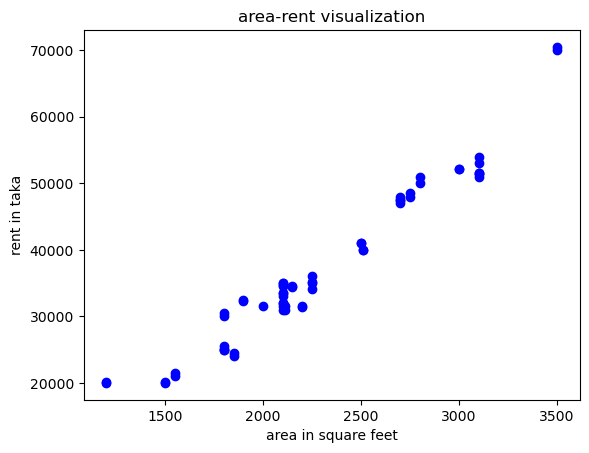

In [32]:
plt.scatter(x, y, color='blue') # 2D PLot
plt.xlabel('area in square feet')
plt.ylabel('rent in taka')
plt.title('area-rent visualization')

# Data Split

In [33]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x = df.drop('rent', axis=1) # 1 for col and 0 for rows ; df[['area']] 
y = df[['rent']]

In [36]:
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [37]:
y.head()

,rent
0,31500
1,35000
2,41050
3,36100
4,52100


In [38]:
xtrain, xtest, ytrain, ytest = train_test_split(x , y, test_size=.30)

In [39]:
xtrain.head() # 70% data

,area
29,3100
0,2000
20,2110
39,2100
6,1500


In [40]:
ytrain.head()

,rent
29,51400
0,31500
20,31500
39,31500
6,20000


In [41]:
xtest.head()

,area
50,2110
2,2500
38,2700
45,3100
12,2100


In [42]:
xtest.shape

(18, 1)

In [43]:
xtrain.shape


(42, 1)

In [44]:
reg.fit(xtrain, ytrain) # training ml model with train data

LinearRegression()

In [45]:
reg.predict(xtest) #input area and it will return predicted rent

array([[33606.29608356],
       [41614.96000224],
       [45721.96714002],
       [53935.98141558],
       [33400.94572667],
       [62149.99569114],
       [27240.43502   ],
       [33400.94572667],
       [46748.71892446],
       [28267.18680445],
       [27240.43502   ],
       [22106.67609778],
       [34427.69751112],
       [27240.43502   ],
       [33400.94572667],
       [53935.98141558],
       [45721.96714002],
       [51882.47784669]])

In [46]:
ytest.head()

,rent
50,31000
2,41050
38,47500
45,51000
12,34500


In [47]:
ytest['predicted_y'] = reg.predict(xtest)

In [48]:
ytest.head()

,rent,predicted_y
50,31000,33606.296084
2,41050,41614.960002
38,47500,45721.967140
45,51000,53935.981416
12,34500,33400.945727


In [49]:
len(ytest)

18

In [50]:
ytest.drop('predicted_y', axis=1, inplace=True)

In [51]:
ytest.head()

,rent
50,31000
2,41050
38,47500
45,51000
12,34500


In [52]:
#training score
reg.score(xtrain, ytrain)

0.9464560193140931

In [53]:
#testing accuracy
reg.score(xtest, ytest)

0.9523152791509315

# MSE & MAE

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [55]:
mse = mean_squared_error(ytest, reg.predict(xtest))

In [56]:
mse

7790499.996197876

In [57]:
mean_absolute_error(ytest, reg.predict(xtest))

2080.0574074808833

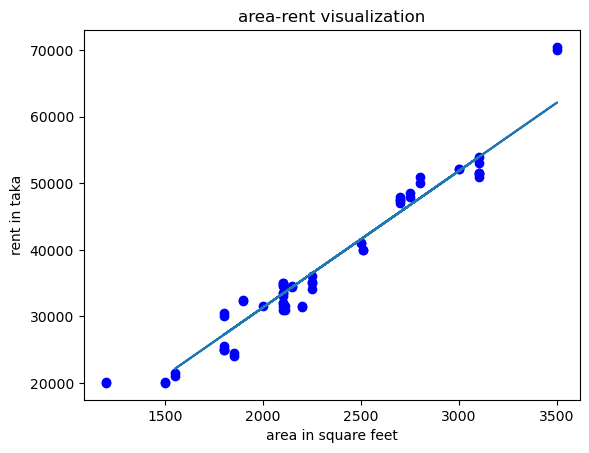

In [58]:
plt.scatter(x, y, color='blue') # 2D PLot
plt.xlabel('area in square feet')
plt.ylabel('rent in taka')
plt.title('area-rent visualization')
plt.plot(xtest, reg.predict(xtest))

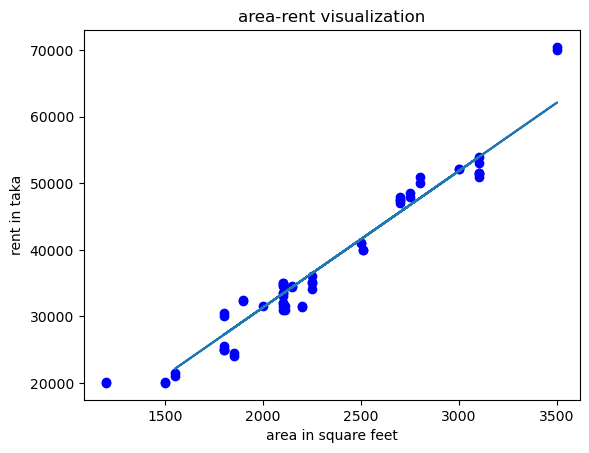

In [59]:
plt.scatter(x, y, color='blue') # 2D PLot
plt.xlabel('area in square feet')
plt.ylabel('rent in taka')
plt.title('area-rent visualization')
plt.plot(xtest.squeeze(), reg.predict(xtest))

# Save ML Model

In [60]:
reg.predict([[3100]])

array([[53935.98141558]])

In [61]:
reg.predict([[3200]])

array([[55989.48498447]])

In [62]:
#pickle
import pickle as pk
import joblib as jb

In [63]:
pk.dump(reg, open('lr1','wb'))

In [64]:
reg2 = pk.load(open('lr1','rb'))

In [65]:
reg2

LinearRegression()

In [66]:
reg2.predict([[3100]])

array([[53935.98141558]])

In [67]:
reg2.predict([[3200]])

array([[55989.48498447]])

In [68]:
#joblib
jb.dump(reg,'lr_jb' )

['lr_jb']

In [69]:
reg4 = jb.load('lr_jb')

In [70]:
reg4.predict([[3100]])

array([[53935.98141558]])

In [72]:
import os
os.getcwd()

'C:\\Local Disk F\\aiQuest Intelligence\\Data Science and Machine Learning\\Batch 18\\Class 11'